### Harvard GSD  J-Term 2022 
### Introduction to Data Science for Building Simulation and Architectural Design
***
Instructor: Jung Min Han, jhan2@gsd.harvard.edu <br>
Date/Time: Jan 3-7/ 10:00 - 11:30 a.m. <br>
***

Pease copy this colab notebook and rename it before you start! 

---


In [5]:
import numpy as np
import pandas as pd
import os

## Read and Manupulation: weather file

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# pandas data frame from csv
def getPandasFromFile(path, fileName, theSkipRow):
    path = os.path.join(path , fileName)
    return pd.read_csv(path, skiprows= theSkipRow , header=None, index_col = False)
def SavePandasToCSV(d, path):
    d.to_csv(path)
    return "done!!"

# modify the following file path for your GoogleDrive
FILEPATH = '/content/drive/My Drive/Colab Notebooks/J_Term/USA_MA_Boston-Logan.Intl.AP.725090_TMY3.epw'

df = getPandasFromFile("",FILEPATH,8)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1976,1,1,1,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.7,-3.9,67,100900,0,0,290,0,0,0,0,0,0,0,360,6.2,10,10,19.3,3960,9,999999999,89,0.089,0,88,999.00,999.0,99.0
1,1976,1,1,2,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.7,-3.9,67,100800,0,0,290,0,0,0,0,0,0,0,350,5.7,10,10,19.3,3960,9,999999999,89,0.089,0,88,999.00,999.0,99.0
2,1976,1,1,3,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.1,-3.9,70,100800,0,0,287,0,0,0,0,0,0,0,360,6.2,10,10,20.9,3960,9,999999999,89,0.089,0,88,999.00,999.0,99.0
3,1976,1,1,4,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.1,-3.9,70,100700,0,0,287,0,0,0,0,0,0,0,10,5.7,10,10,20.9,3960,9,999999999,89,0.089,0,88,999.00,999.0,99.0
4,1976,1,1,5,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.1,-4.4,67,100700,0,0,287,0,0,0,0,0,0,0,10,5.7,10,10,24.1,3960,9,999999999,80,0.089,0,88,999.00,999.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2003,12,31,20,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9?9...,5.0,-3.9,51,101400,0,0,304,0,0,0,0,0,0,0,230,8.8,10,10,16.0,3658,9,999999999,69,0.093,0,88,0.16,0.0,1.0
8756,2003,12,31,21,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9?9...,4.4,-3.3,55,101400,0,0,262,0,0,0,0,0,0,0,240,7.7,0,0,16.0,77777,9,999999999,80,0.093,0,88,0.16,0.0,1.0
8757,2003,12,31,22,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9?9...,4.4,-3.9,53,101300,0,0,270,0,0,0,0,0,0,0,230,7.7,2,2,16.0,77777,9,999999999,80,0.093,0,88,0.16,0.0,1.0
8758,2003,12,31,23,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9?9...,5.0,-3.3,53,101300,0,0,290,0,0,0,0,0,0,0,240,7.2,8,8,16.0,2286,9,999999999,80,0.093,0,88,0.16,0.0,1.0


In [8]:
# rename dataframe with known column names

theDf =df.rename(index=str, columns={0:"year", 1: "Month", 2: "Day", 3:"Hour",4:"Minute",6:"DB_temp",
                                     7:"Dew_Point",
                                     8:"RH",9:"P", 10:"Horiz_Rad",11:"Normal_Rad",12:"Sky_Rad",
                                     13:"G_Horiz_Rad",14:"Dir_Normal_Rad",15:"Diff_Horiz_Rad",
                                     16:"G_Horiz_Illu",17:"Dir_Normal_Illu",18:"Diff_Horiz_Illu",
                                     19:"Zenith_Illu",20:"Wind_Direction",21:"Wind_Speed",
                                     22:"Total_Sky_Cov",23:"Opaque_Sky_Cov",24:"Visibility",
                                     25:"field_Ceiling_H",26:"Whtr_Observ",27:"Whtr_Codes",
                                     28:"Pred_Water",29:"AeroesOptical_D",30:"Snow_Depth",
                                     31:"Days_Since_Snow"
                                    })

In [9]:
# your code here



,year,Month,Day,Hour,Minute,5,DB_temp,Dew_Point,RH,P,Horiz_Rad,Normal_Rad,Sky_Rad,G_Horiz_Rad,Dir_Normal_Rad,Diff_Horiz_Rad,G_Horiz_Illu,Dir_Normal_Illu,Diff_Horiz_Illu,Zenith_Illu,Wind_Direction,Wind_Speed,Total_Sky_Cov,Opaque_Sky_Cov,Visibility,field_Ceiling_H,Whtr_Observ,Whtr_Codes,Pred_Water,AeroesOptical_D,Snow_Depth,Days_Since_Snow,32,33,34
0,1976,1,1,1,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.7,-3.9,67,100900,0,0,290,0,0,0,0,0,0,0,360,6.2,10,10,19.3,3960,9,999999999,89,0.089,0,88,999.0,999.0,99.0
1,1976,1,1,2,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.7,-3.9,67,100800,0,0,290,0,0,0,0,0,0,0,350,5.7,10,10,19.3,3960,9,999999999,89,0.089,0,88,999.0,999.0,99.0
2,1976,1,1,3,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.1,-3.9,70,100800,0,0,287,0,0,0,0,0,0,0,360,6.2,10,10,20.9,3960,9,999999999,89,0.089,0,88,999.0,999.0,99.0


In [10]:
# check the the column names

# your code here


array(['year', 'Month', 'Day', 'Hour', 'Minute', 5, 'DB_temp',
       'Dew_Point', 'RH', 'P', 'Horiz_Rad', 'Normal_Rad', 'Sky_Rad',
       'G_Horiz_Rad', 'Dir_Normal_Rad', 'Diff_Horiz_Rad', 'G_Horiz_Illu',
       'Dir_Normal_Illu', 'Diff_Horiz_Illu', 'Zenith_Illu',
       'Wind_Direction', 'Wind_Speed', 'Total_Sky_Cov', 'Opaque_Sky_Cov',
       'Visibility', 'field_Ceiling_H', 'Whtr_Observ', 'Whtr_Codes',
       'Pred_Water', 'AeroesOptical_D', 'Snow_Depth', 'Days_Since_Snow',
       32, 33, 34], dtype=object)

In [11]:
# create subset dataframe of weather information
NewDf = theDf[['DB_temp',"Dew_Point",
               'RH','P','Normal_Rad', 'Sky_Rad','Wind_Direction', 'Wind_Speed'
              ]]
NewDf.tail()

,DB_temp,Dew_Point,RH,P,Normal_Rad,Sky_Rad,Wind_Direction,Wind_Speed
8755,5.0,-3.9,51,101400,0,304,230,8.8
8756,4.4,-3.3,55,101400,0,262,240,7.7
8757,4.4,-3.9,53,101300,0,270,230,7.7
8758,5.0,-3.3,53,101300,0,290,240,7.2
8759,5.0,-3.3,53,101200,0,296,230,7.2


In [12]:
# Create index with time series information

# your code here

NewDf.index = myTime
NewDf

,DB_temp,Dew_Point,RH,P,Normal_Rad,Sky_Rad,Wind_Direction,Wind_Speed
2020-01-01 00:00:00,1.7,-3.9,67,100900,0,290,360,6.2
2020-01-01 01:00:00,1.7,-3.9,67,100800,0,290,350,5.7
2020-01-01 02:00:00,1.1,-3.9,70,100800,0,287,360,6.2
2020-01-01 03:00:00,1.1,-3.9,70,100700,0,287,10,5.7
2020-01-01 04:00:00,1.1,-4.4,67,100700,0,287,10,5.7
...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,5.0,-3.9,51,101400,0,304,230,8.8
2020-12-30 20:00:00,4.4,-3.3,55,101400,0,262,240,7.7
2020-12-30 21:00:00,4.4,-3.9,53,101300,0,270,230,7.7
2020-12-30 22:00:00,5.0,-3.3,53,101300,0,290,240,7.2


In [13]:
NewDf.describe()

,DB_temp,Dew_Point,RH,P,Normal_Rad,Sky_Rad,Wind_Direction,Wind_Speed
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,10.599578,3.830559,65.676142,101468.824201,689.765982,318.564498,219.007991,5.484703
std,9.918710,10.730105,19.749037,929.330511,661.566938,57.612886,96.724574,2.267986
min,-20.000000,-32.200000,19.000000,98200.000000,0.000000,161.000000,0.000000,0.000000
25%,2.800000,-3.900000,50.000000,100900.000000,0.000000,277.000000,150.000000,4.100000
50%,10.600000,4.400000,65.000000,101500.000000,799.500000,317.000000,240.000000,5.200000
75%,18.300000,12.800000,83.000000,102100.000000,1351.000000,362.000000,300.000000,6.700000
max,37.200000,23.300000,100.000000,104100.000000,1415.000000,470.000000,360.000000,21.600000


In [14]:
# Save the dataframe to the file 

# your code here



'done!!'

## Visualization: weather information

In [15]:
# Import libraries for the visualization
import matplotlib
import matplotlib.pyplot as plt

### Visualize dry bulb temperature with boundary condition

No handles with labels found to put in legend.


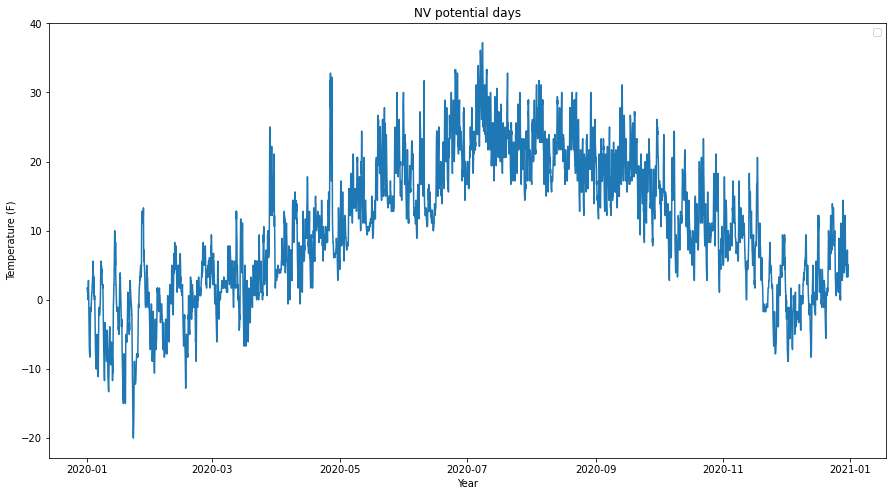

In [16]:
# your code here


plt.figure(figsize=(15,8))
plt.plot(x,temp)
plt.title('NV potential days')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.legend(loc='best')

plt.show()

No handles with labels found to put in legend.


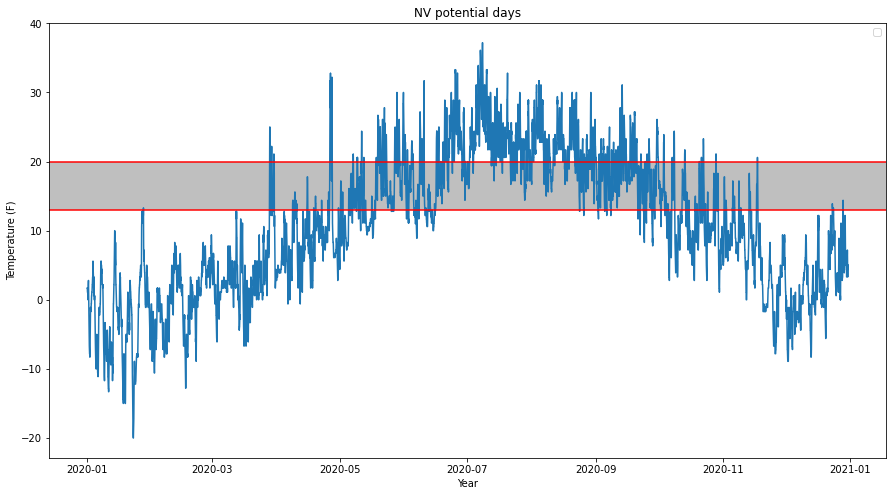

In [18]:
plt.figure(figsize=(15,8))
plt.plot(myTime,temp)
plt.title('NV potential days')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.legend(loc='best')

# your code here



plt.show()

### Visualize histogram of relative humidity data

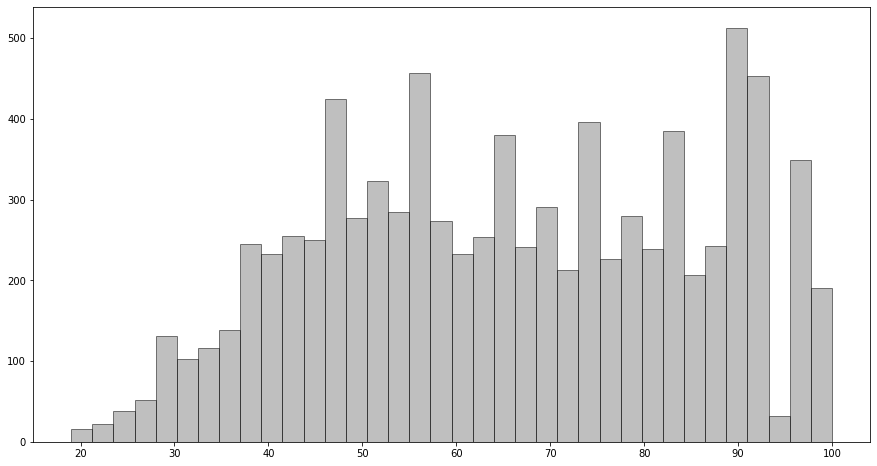

In [19]:
# your code here


plt.figure(figsize=(15,8))
plt.hist(RH, bins =36, color ="grey", edgecolor='black', alpha = 0.5)
plt.show()

## epw file modification

In [20]:
# Read data
d = getPandasFromFile("",FILEPATH, 8)
d.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1976,1,1,1,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.7,-3.9,67,100900,0,0,290,0,0,0,0,0,0,0,360,6.2,10,10,19.3,3960,9,999999999,89,0.089,0,88,999.0,999.0,99.0
1,1976,1,1,2,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.7,-3.9,67,100800,0,0,290,0,0,0,0,0,0,0,350,5.7,10,10,19.3,3960,9,999999999,89,0.089,0,88,999.0,999.0,99.0
2,1976,1,1,3,0,?9?9?9?9E0?9?9?9?9?9?9?9?9?9?9?9?9?9?9?9*9*9*9...,1.1,-3.9,70,100800,0,0,287,0,0,0,0,0,0,0,360,6.2,10,10,20.9,3960,9,999999999,89,0.089,0,88,999.0,999.0,99.0


In [21]:
# select target values
df_wind = d.iloc[:,21]
print (df_wind)

0       6.2
1       5.7
2       6.2
3       5.7
4       5.7
       ... 
8755    8.8
8756    7.7
8757    7.7
8758    7.2
8759    7.2
Name: 21, Length: 8760, dtype: float64


In [22]:
# Create value list to replace target list
array = []
for i in range (0,len(df_wind)):
    array.append(float(0.1))

d.loc[:,21] = array

In [23]:
# replace target list to the new list
df_wind = d.iloc[:,21]
print (df_wind)

0       0.1
1       0.1
2       0.1
3       0.1
4       0.1
       ... 
8755    0.1
8756    0.1
8757    0.1
8758    0.1
8759    0.1
Name: 21, Length: 8760, dtype: float64


In [24]:
# Save data frame
d.to_csv("/content/drive/My Drive/Colab Notebooks/J_Term/my2.epw", index=False)